# Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np

Load the raw dataset

In [3]:
df = pd.read_csv('sales.csv')

Display basic info and first few rows

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   State           4248 non-null   object
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Profit          4248 non-null   int64 
 5   Margin          4248 non-null   int64 
 6   Sales           4248 non-null   int64 
 7   COGS            4248 non-null   int64 
 8   Total Expenses  4248 non-null   int64 
 9   Marketing       4248 non-null   int64 
 10  Inventory       4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget COGS     4248 non-null   int64 
 13  Budget Margin   4248 non-null   int64 
 14  Budget Sales    4248 non-null   int64 
 15  ProductId       4248 non-null   int64 
 16  Date            4248 non-null   object
 17  Product Type    4248 non-null   object
 18  Product 

Check for missing values

In [5]:
print(df.isnull().sum())

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64


# Clean the Data

Convert 'Date' column to datetime

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Handle missing values (if any, though none in this dataset)

In [8]:
df.fillna(0, inplace=True)  # Replace NaN with 0 for numerical columns

Remove duplicates

In [9]:
df.drop_duplicates(inplace=True)

Check for negative profits or sales (anomaly detection)

In [10]:
anomalies = df[(df['Profit'] < 0) | (df['Sales'] < 0)]
print("Anomalies (negative values):", len(anomalies))

Anomalies (negative values): 528


# Save cleaned data

In [11]:
df.to_csv('cleaned_coffee_tea_sales.csv', index=False)

# Data Analysis with Python

Summary statistics

In [13]:
print(df.describe())

         Area Code       Profit       Margin        Sales         COGS  \
count  4248.000000  4248.000000  4248.000000  4248.000000  4248.000000   
mean    582.278013    61.097693   104.293315   192.987524    84.433145   
min     203.000000  -638.000000  -302.000000    17.000000     0.000000   
25%     417.000000    17.000000    52.750000   100.000000    43.000000   
50%     573.000000    40.000000    76.000000   138.000000    60.000000   
75%     772.000000    92.000000   132.000000   230.000000   100.000000   
max     985.000000   778.000000   613.000000   912.000000   364.000000   
std     221.140310   101.708546    94.342522   151.133127    67.249769   

       Total Expenses    Marketing    Inventory  Budget Profit  Budget COGS  \
count     4248.000000  4248.000000  4248.000000    4248.000000  4248.000000   
mean        54.063559    31.185028   749.381356      60.913371    74.830508   
min         10.000000     0.000000 -3534.000000    -320.000000     0.000000   
25%         33.00

Group by Product Type and calculate total sales and profit

In [16]:
product_summary = df.groupby('Product Type')[['Sales', 'Profit']].sum()
print(product_summary)

               Sales  Profit
Product Type                
Coffee        216828   74683
Espresso      222996   68620
Herbal Tea    207214   63254
Tea           172773   52986


# Visualize Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot 1: Sales and Profit by Product Type

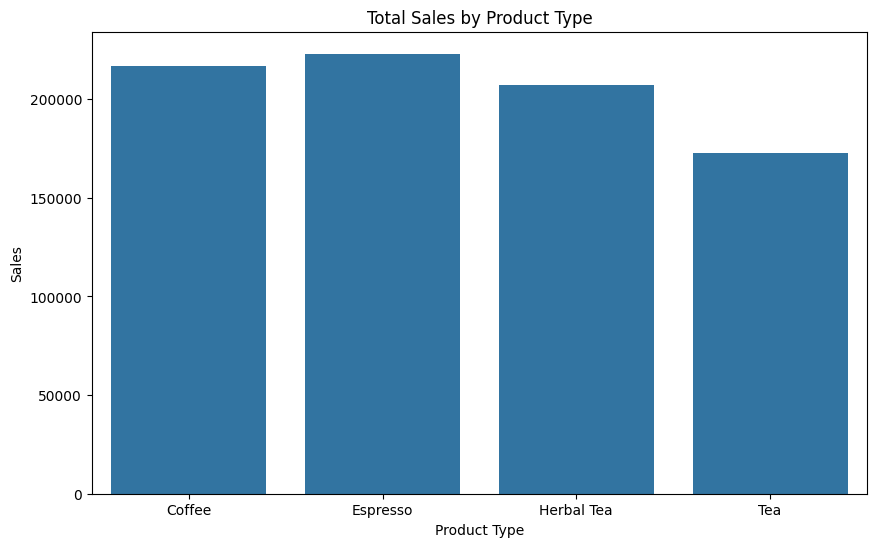

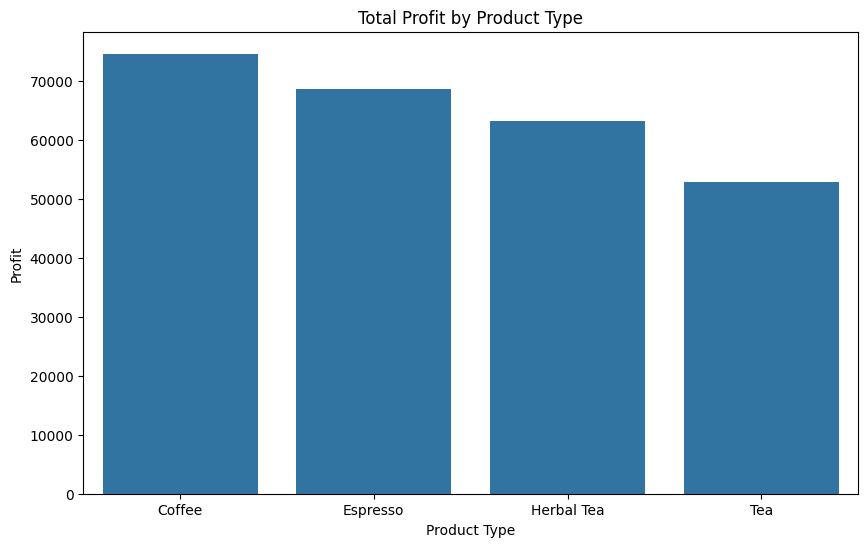

In [30]:
# Group by Product Type and calculate totals
product_type_summary = df.groupby('Product Type')[['Sales', 'Profit']].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Type', y='Sales', data=product_type_summary)
plt.title('Total Sales by Product Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Type', y='Profit', data=product_type_summary)
plt.title('Total Profit by Product Type')
plt.show()

Plot 2: Profit vs Margin by State

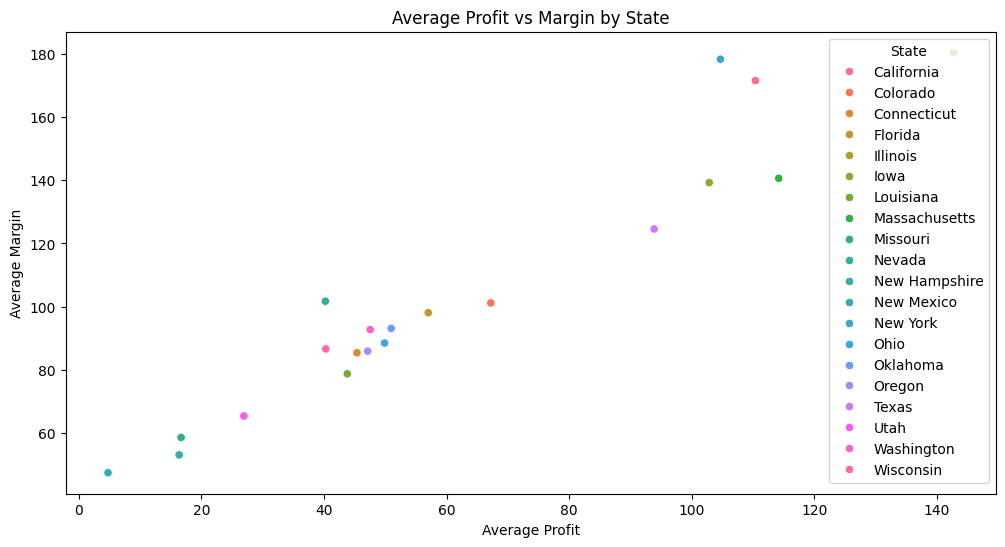

In [19]:
state_summary = df.groupby('State')[['Profit', 'Margin']].mean()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Profit', y='Margin', hue=state_summary.index, data=state_summary)
plt.title('Average Profit vs Margin by State')
plt.xlabel('Average Profit')
plt.ylabel('Average Margin')
plt.savefig('profit_vs_margin_by_state.png')
plt.show()

Plot 3: Sales vs Budget Sales by Market Size

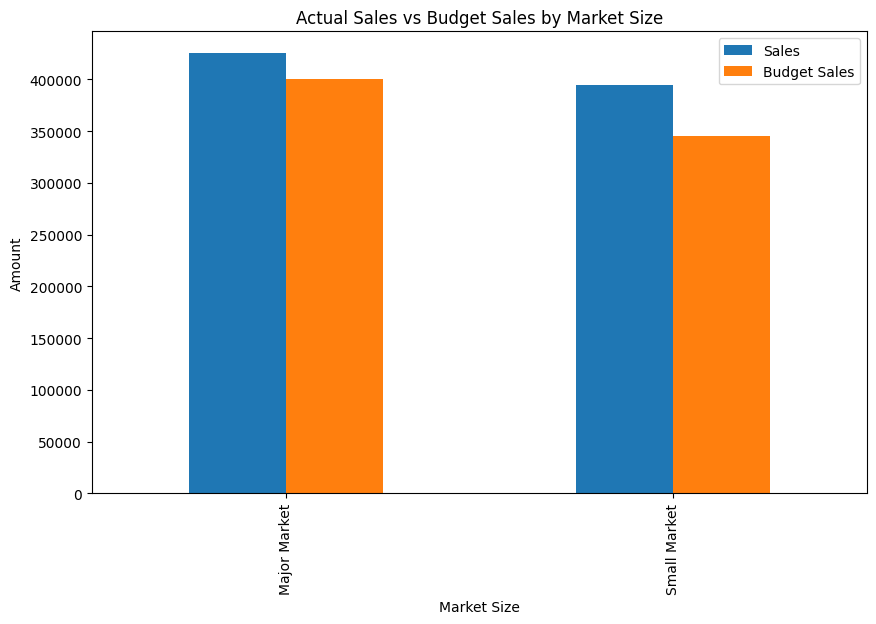

In [22]:
market_summary = df.groupby('Market Size')[['Sales', 'Budget Sales']].sum()
market_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Actual Sales vs Budget Sales by Market Size')
plt.xlabel('Market Size')
plt.ylabel('Amount')
plt.savefig('sales_vs_budget_by_market.png')
plt.show()

 # Correlation Analysis

Calculate correlation matrix

In [24]:
correlation = df[['Profit', 'Sales', 'COGS', 'Total Expenses', 'Marketing']].corr()
print(correlation)

                  Profit     Sales      COGS  Total Expenses  Marketing
Profit          1.000000  0.797331  0.464838        0.199976   0.225465
Sales           0.797331  1.000000  0.886651        0.689350   0.710515
COGS            0.464838  0.886651  1.000000        0.782534   0.818271
Total Expenses  0.199976  0.689350  0.782534        1.000000   0.966167
Marketing       0.225465  0.710515  0.818271        0.966167   1.000000


Heatmap of correlations

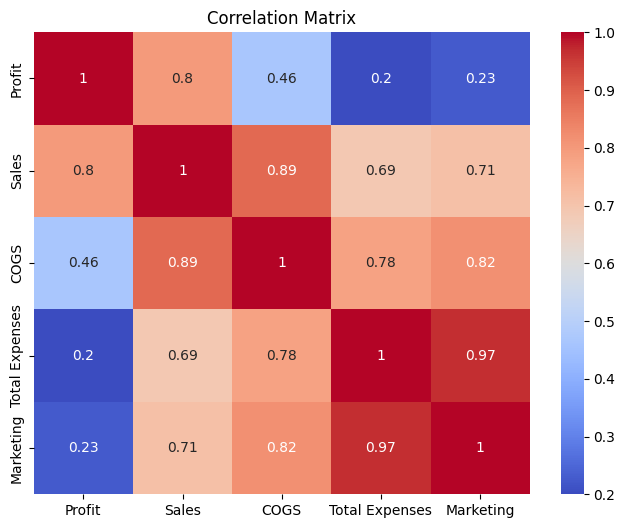

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

Trend Analysis Over Time

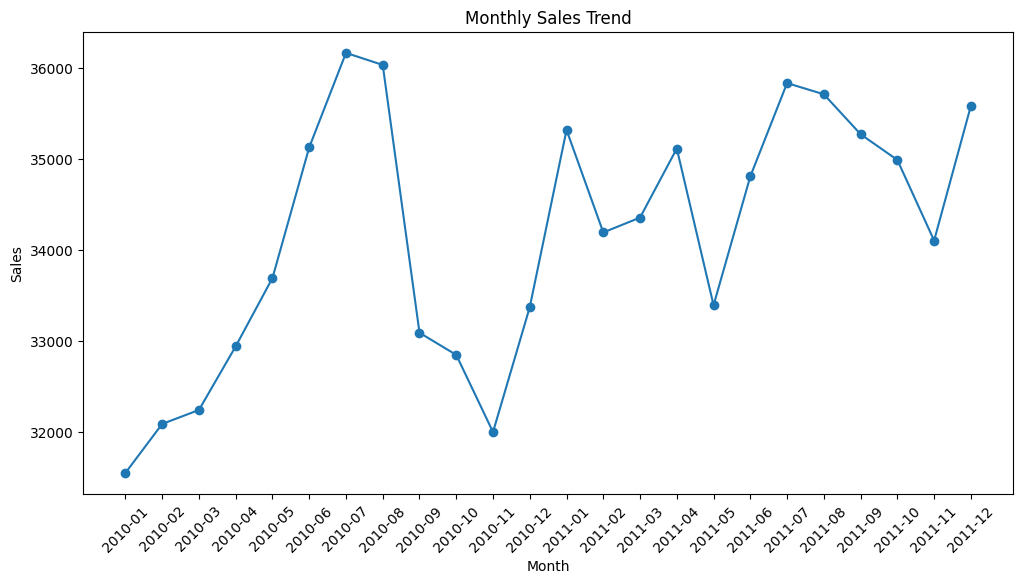

In [26]:
# Aggregate sales by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Profit Margin Analysis

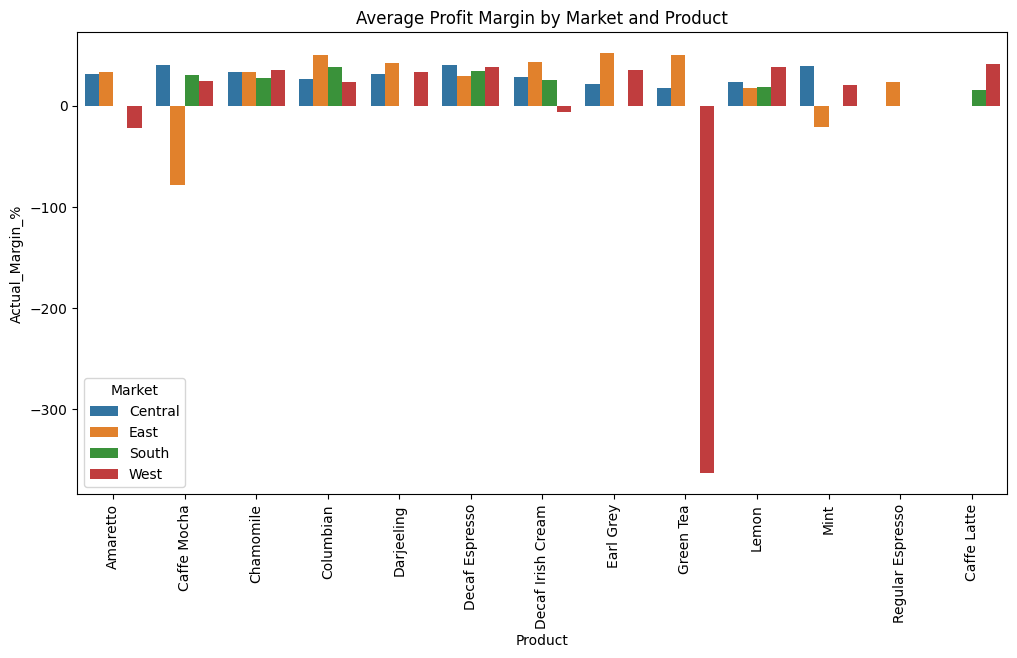

In [28]:
# Calculate actual profit margin
df['Actual_Margin_%'] = (df['Profit'] / df['Sales']) * 100

# Group by Market and Product
margin_by_market_product = df.groupby(['Market', 'Product'])['Actual_Margin_%'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Actual_Margin_%', hue='Market', data=margin_by_market_product)
plt.title('Average Profit Margin by Market and Product')
plt.xticks(rotation=90)
plt.show()